In [1]:
import itertools
import sys,os
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.2, rc={"xtick.bottom" : True, "ytick.left" : True})
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

## Radial distribution function

In [5]:
!ls ../analysis/GGKGG_soup_XXXL_amber99sb-star-ildn_tip3p_neutral_l0_NZ_OW.xvg


ls: ../analysis/GGKGG_soup_XXXL_amber99sb-star-ildn_tip3p_neutral_l0_NZ_OW.xvg: No such file or directory


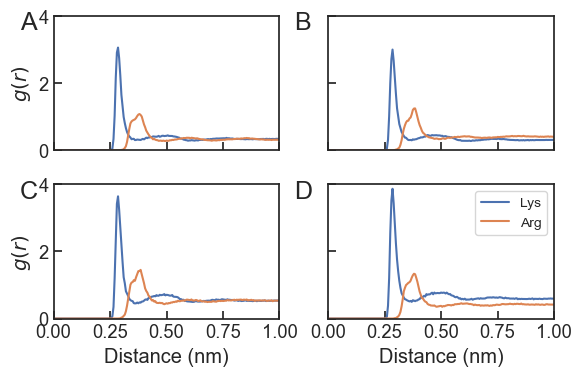

In [63]:
fig, ax = plt.subplots(2,2, figsize=(6,4), sharex=True, sharey=True)
for k, soup in enumerate(["soup", "soupF"]):
    for i,ions in enumerate(["neutral", "phys"]):
        for l in [0,1]:
            data = np.loadtxt('../analysis/GGKGG_%s_XXXL_amber99sb-star-ildn_tip3p_%s_l%d_NZ_OW.xvg'%(soup, ions,l), comments=['@', '#'] )
            if l == 0:
                ax[k][i].plot(data[:,0], data[:,1], label='Lys')
            else:
                ax[k][i].plot(data[:,0], data[:,1], label='Arg')
[ax[1][i].set_xlabel('Distance (nm)') for i in [0,1]]
[ax[i][0].set_ylabel('$g(r)$') for i in [0,1]]
ax[0][0].set_xlim(0,1)
ax[1][0].set_ylim(0,4.)
ax[0][0].text(-0.15,0.9, 'A', transform=ax[0][0].transAxes, fontsize=18)
ax[0][0].text(-0.15,0.9, 'B', transform=ax[0][1].transAxes, fontsize=18)
ax[0][0].text(-0.15,0.9, 'C', transform=ax[1][0].transAxes, fontsize=18)
ax[0][0].text(-0.15,0.9, 'D', transform=ax[1][1].transAxes, fontsize=18)
plt.legend(fontsize=10)

plt.tight_layout(w_pad=1, h_pad=-1)
plt.savefig('figures/rdf.png', dpi=300)

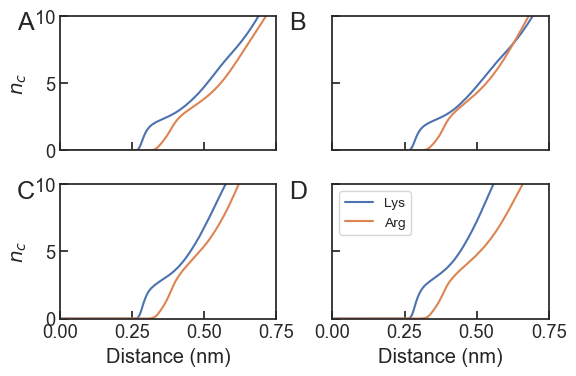

In [89]:
fig, ax = plt.subplots(2,2, figsize=(6,4), sharex=True, sharey=True)
for k, soup in enumerate(["soup", "soupF"]):
    for i,ions in enumerate(["neutral", "phys"]):
        for l in [0,1]:
            data = np.loadtxt('../analysis/GGKGG_%s_XXXL_amber99sb-star-ildn_tip3p_%s_l%d_NZ_OW_cn.xvg'%(soup, ions,l), comments=['@', '#'] )
            if l == 0:
                ax[k][i].plot(data[:,0], data[:,1], label='Lys')
            else:
                ax[k][i].plot(data[:,0], data[:,1], label='Arg')
[ax[1][i].set_xlabel('Distance (nm)') for i in [0,1]]
[ax[i][0].set_ylabel('$n_c$') for i in [0,1]]
ax[0][0].set_xlim(0,0.75)
ax[1][0].set_ylim(0,10.)
ax[0][0].text(-0.2,0.9, 'A', transform=ax[0][0].transAxes, fontsize=18)
ax[0][0].text(-0.2,0.9, 'B', transform=ax[0][1].transAxes, fontsize=18)
ax[0][0].text(-0.2,0.9, 'C', transform=ax[1][0].transAxes, fontsize=18)
ax[0][0].text(-0.2,0.9, 'D', transform=ax[1][1].transAxes, fontsize=18)
plt.legend(fontsize=10)

plt.tight_layout(w_pad=1, h_pad=-1)
plt.savefig('figures/nc.png', dpi=300)

/var/folders/w_/6y6c02w52ydcq3xnpj_nt2tr0000gn/T/ipykernel_11587/2117144651.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(w_pad=1., h_pad=-2)


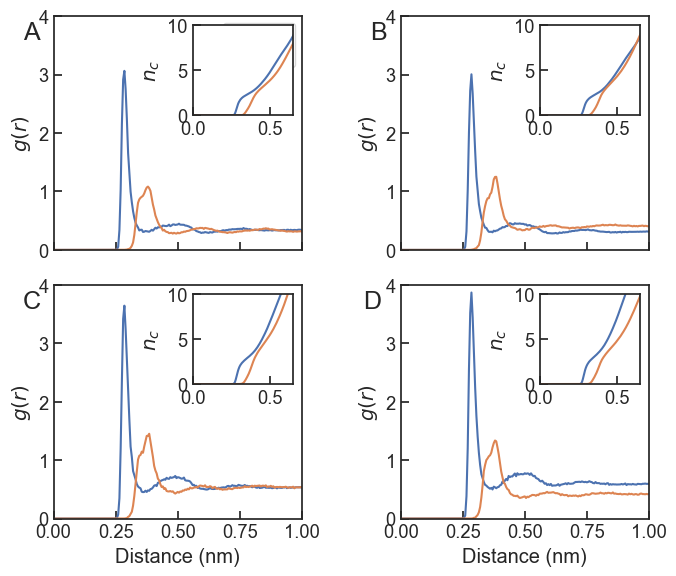

In [96]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(2,2, figsize=(7,6), sharex=True, sharey=False)
for k, soup in enumerate(["soup", "soupF"]):
    for i,ions in enumerate(["neutral", "phys"]):
        axins = inset_axes(ax[k][i], width=1., height=0.9)

        for l in [0,1]:
            gr = np.loadtxt('../analysis/GGKGG_%s_XXXL_amber99sb-star-ildn_tip3p_%s_l%d_NZ_OW.xvg'%(soup, ions,l), comments=['@', '#'] )
            gr_cn = np.loadtxt('../analysis/GGKGG_%s_XXXL_amber99sb-star-ildn_tip3p_%s_l%d_NZ_OW_cn.xvg'%(soup, ions,l), comments=['@', '#'] )
            if l == 0:
                ax[k][i].plot(gr[:,0], gr[:,1], label='Lys')
            else:
                ax[k][i].plot(gr[:,0], gr[:,1], label='Arg')
            axins.plot(gr_cn[:,0], gr_cn[:,1])

        #    axins = inset_axes(ax[k][i], width=1.3, height=0.9)
        axins.set_xlim(0,0.65); axins.set_ylim(0,10.)
        axins.set_ylabel('$n_c$')
    
[ax[1][i].set_xlabel('Distance (nm)') for i in [0,1]]
[ax[i][0].set_ylabel('$g(r)$') for i in [0,1]]
[ax[i][1].set_ylabel('$g(r)$') for i in [0,1]]
ax[0][0].set_xlim(0,1)
[ax[i][j].set_ylim(0,4.) for i,j in itertools.product([0,1], repeat=2)]
ax[0][0].text(-0.125,0.9, 'A', transform=ax[0][0].transAxes, fontsize=18)
ax[0][0].text(-0.125,0.9, 'B', transform=ax[0][1].transAxes, fontsize=18)
ax[0][0].text(-0.125,0.9, 'C', transform=ax[1][0].transAxes, fontsize=18)
ax[0][0].text(-0.15,0.9, 'D', transform=ax[1][1].transAxes, fontsize=18)
ax[0][0].legend(fontsize=10)

fig.tight_layout(w_pad=1., h_pad=-2)
plt.savefig('figures/rdf_cn.png', dpi=300)